In [1]:
import numpy as np
np.random.seed(42)

In [2]:
bandits = np.array([np.random.randn(10) for _ in range(2000)])

In [3]:
optimal_action = np.argmax(bandits, axis=1)

In [4]:
def run_bandit_solver(bandit, action_selector, num_steps=1000):
    action_indices = []
    rewards = []
    q_estimates = np.zeros(bandit.shape)
    n_action = np.zeros(bandit.shape)
    
    for step in range(num_steps):
        action_ix = action_selector.select(bandit, q_estimates, n_action, step)
        reward = np.random.randn() + bandit[action_ix]
        
        rewards.append(reward)
        action_indices.append(action_ix)
        n_action[action_ix] += 1
        q_estimates[action_ix] += ((1/n_action[action_ix]) * (reward - q_estimates[action_ix]))
    
    return np.array(rewards), np.array(action_indices)

In [5]:
class EpsilonGreedy:
    def __init__(self, epsilon):
        self.epsilon = epsilon
    
    def select(self, bandit, q_estimates, n_action, step_num):
        tick = np.random.rand()
        if tick <= self.epsilon:
            ## explore
            return np.random.randint(0, bandit.shape[0])
        else:
            return np.argmax(q_estimates)

In [6]:
rewards, action_indices = [], []

for bandit in bandits:
    r, ac = run_bandit_solver(bandit, EpsilonGreedy(0.1))
    rewards.append(r)
    action_indices.append(ac)

In [7]:
rewards = np.array(rewards)
action_indices = np.array(action_indices)

In [8]:
rewards.shape

(2000, 1000)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

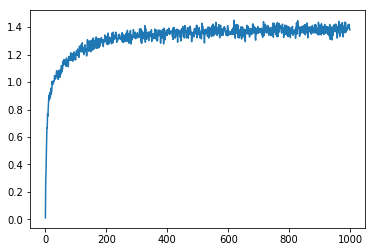

In [10]:
plt.plot(rewards.mean(axis=0))

In [11]:
class UCBSelector:
    def __init__(self, c=2):
        self.c = c
        
    def select(self, bandit, q_estimates, n_action, step):
        for ix in range(bandit.shape[0]):
            if n_action[ix] == 0:
                return ix
        return np.argmax(q_estimates + (self.c * np.sqrt(np.log(step)/n_action)))

In [12]:
u_rewards, u_action_indices = [], []

for bandit in bandits:
    r, ac = run_bandit_solver(bandit, UCBSelector(2))
    u_rewards.append(r)
    u_action_indices.append(ac)

In [13]:
u_rewards = np.array(u_rewards)
u_action_indices = np.array(u_action_indices)

In [14]:
u_rewards.sum()

2813859.133038334

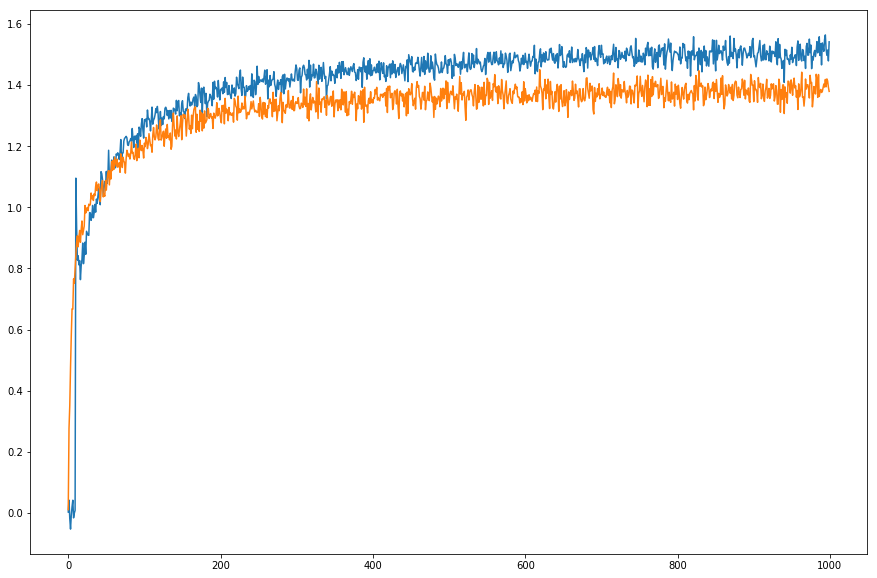

In [15]:
plt.figure(figsize=(15,10))
plt.plot(u_rewards.mean(axis=0))
plt.plot(rewards.mean(axis=0))